# Jupyter Notebook version of Menu_stats.py

(Version 1.0)

<img src="pictures/TDI_logo.png">

### This notebook runs a A/B testing of using static menu versus dynamic menu.  

**Explain the ML project here with a detailed description...**

> Porject description to add...


**Explain this notebook's results here...**

> The backtesting case assumes:

> * Two set of menus: static menu (regular), vs. dynamic menu (adjusted)
> * In both cases customers arrive at the same frequency
> * When customer waiting queue exceeds a thredshold we adjust menus.
> * Customer makes random selection on the menu, the promoted itmes will be ordered with a higher probability.
> * On adjusted menu, we promote items that takes less time to prepare.
> * On regular menu, we promote items that generates most profits.

> We demonstrate the difference it makes by having a dynamic menu on all of the following metrics:

> * cumulative profits
> * cumulative waiting time
> * profit per time unit
> * next customer's waiting time
> * number of customer in queue



In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 25 13:19:07 2020
@author: root
"""
# run this command to have pop up animation window in Spyder: %matplotlib qt
%matplotlib inline


# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set the seed
np.random.seed(42)
import pandas as pd
#import os
#os.chdir('/Users/georgehan/GitHub/menu')
#os.getcwd()

### Set up a simple menu for a salad restaurant:

In [2]:
menu = [['French Sardines Salad', 28, 20],  
        ['Lamb Chop Salad', 27, 19], 
        ['Lobster Salad', 26, 15],
        ['Crab Meat Salad', 25, 15],
        ['Chicken salad', 18, 10], 
        ['German fried potatoes Salad', 17, 8],
        ['Egg Salad', 15, 7], 
        ['Organic Green Salad', 14, 5]
        ] 

df = pd.DataFrame(menu, columns = ['Name', 'Profit_Index', 'Time_Index']) 
print(df)

                          Name  Profit_Index  Time_Index
0        French Sardines Salad            28          20
1              Lamb Chop Salad            27          19
2                Lobster Salad            26          15
3              Crab Meat Salad            25          15
4                Chicken salad            18          10
5  German fried potatoes Salad            17           8
6                    Egg Salad            15           7
7          Organic Green Salad            14           5


### Menu regular vs fast:

Add more description here...

In [3]:
def normalize(df):
    profit_scale = max(df['Profit_Index'])
    time_scale = max(df['Time_Index'])
    df['Profit_Index'] = df['Profit_Index'].astype(float)/profit_scale
    df['Time_Index'] = df['Time_Index'].astype(float)/time_scale
    return df

def menu_regular(df):
    profits = df['Profit_Index'].tolist()
    profits.extend([profits[0], profits[0]])
    times = df['Time_Index'].tolist()
    times.extend([times[0], times[0]])
    return profits, times

def menu_fast(df):
    profits = df['Profit_Index'].tolist()
    profits.extend([profits[-1], profits[-1]])
    times = df['Time_Index'].tolist()
    times.extend([times[-1], times[-1]])
    return profits, times


In [4]:
def menu_simulation(df, N, rate, l, seed=42):
    """Runs a simulated crowd of customer.
    
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param int rate: frequency (minutes) for customer arriving
    :feed list of Profit_Indexs and Time_Indexes in df format
    :param int seed: initial seed of the random generator
    :returns outputs time series: 
        cumulative profits, cumulative waiting time, profit per time unit
        next customer's waiting time, number of customer in queue
    """
    # set the seed
    np.random.seed(seed)
    
    unit_profit = []
    profits_output = []
    waiting_times_output = []
    curr_waiting_times = []
    queue_output = []
    profits, times = menu_regular(df)
    total_profit = 0
    total_waiting_time = 0
    queue = 0
    
    for t in range(0, N):
        if t%rate == 0:
            queue += 1
            
        if t >= total_waiting_time:
            random_dish = np.random.randint(0, 10)
            #print(random_dish, end = ' ')
            total_profit += profits[random_dish]
            total_waiting_time += times[random_dish]
            queue -= 1
            #print(total_waiting_time, end = ' ')
        else:
            pass
        
        profits_output.append(total_profit)
        unit_profit.append(total_profit/(t+1))
        waiting_times_output.append(total_waiting_time)
        curr_waiting_times.append(total_waiting_time-t)
        queue_output.append(queue)
        
    return profits_output, waiting_times_output, unit_profit, curr_waiting_times, queue_output


### Menu simulation: regular vs fast


Add more description here...

In [5]:
def menu_simulation_adjusted(df, N, rate, l, seed=42):
    """Runs a simulated crowd of customer.
    
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param int rate: frequency (minutes) for customer arriving
    :feed list of Profit_Indexs and Time_Indexes in df format
    :param int seed: initial seed of the random generator
    :returns outputs time series: 
        cumulative profits, cumulative waiting time, profit per time unit
        next customer's waiting time, number of customer in queue
    """
    # set the seed
    np.random.seed(seed)
    
    unit_profit = []
    profits_output = []
    waiting_times_output = []
    curr_waiting_times = []
    queue_output = []
    profits, times = menu_regular(df)
    total_profit = 0
    total_waiting_time = 0
    queue = 0
    
    for t in range(0, N):
        if t%rate == 0:
            queue += 1
            
        if t >= total_waiting_time:
            random_dish = np.random.randint(0, 10)
            #print(random_dish, end = ' ')
            total_profit += profits[random_dish]
            total_waiting_time += times[random_dish]
            queue -= 1
            #print(total_waiting_time, end = ' ')
        else:
            if queue > l:
                profits, times = menu_fast(df)
            elif queue < l:
                profits, times = menu_regular(df)
            pass
        
        profits_output.append(total_profit)
        unit_profit.append(total_profit/(t+1))
        waiting_times_output.append(total_waiting_time)
        curr_waiting_times.append(total_waiting_time-t)
        queue_output.append(queue)
        
    return profits_output, waiting_times_output, unit_profit, curr_waiting_times, queue_output



### Average wait time and Total profit: regular vs fast


Add more description here...

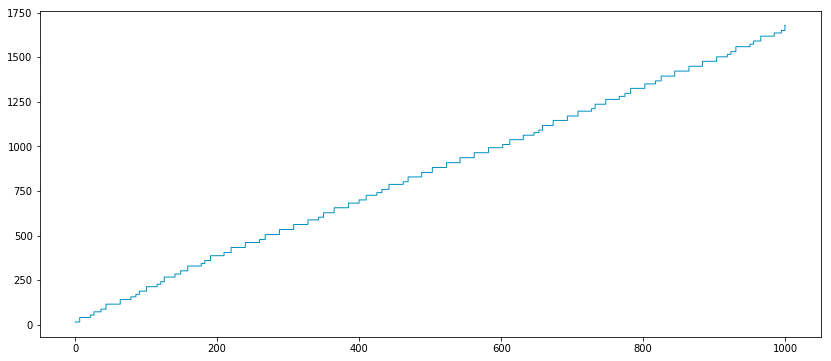

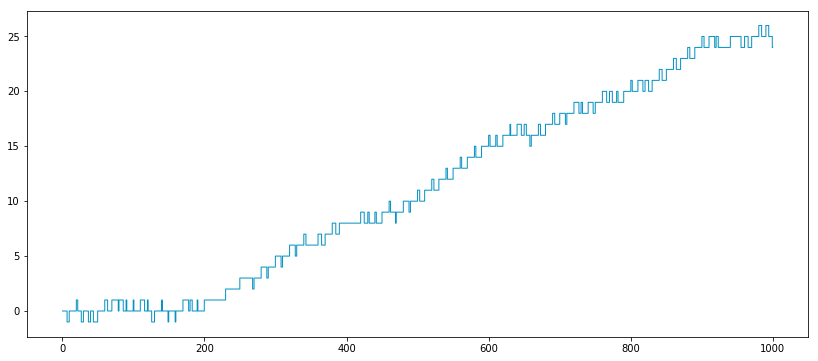

Average wait time: 13.157894736842104 minutes. 
Number of customer served: 76
Total profit: $1679


In [6]:
seed = 42
N = 1000 # number of discret points
t = np.linspace(0.0, N, N)
P, T, U, C, Q = menu_simulation(df, N, 10, 1.0, seed)

plt.figure(figsize=(14, 6))
plt.step(t, P, where='mid', lw=1, color='#0492c2')

plt.figure(figsize=(14, 6))
plt.step(t, Q, where='mid', lw=1, color='#0492c2')
plt.show()    


print("Average wait time: {} minutes. \nNumber of customer served: {}".format(N/len(list(set(T))),  len(list(set(T)))))
print("Total profit: ${}".format(P[-1]))


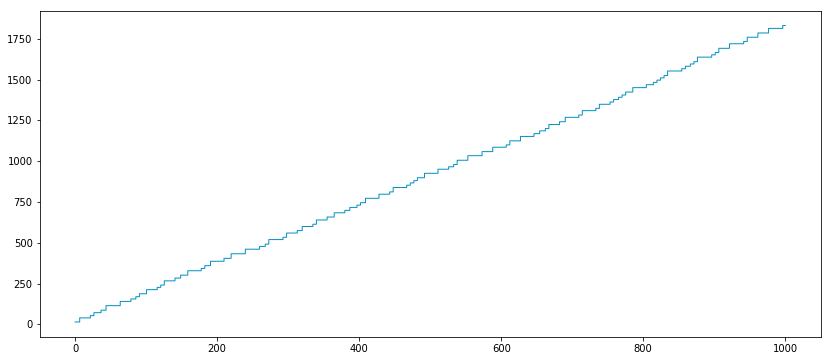

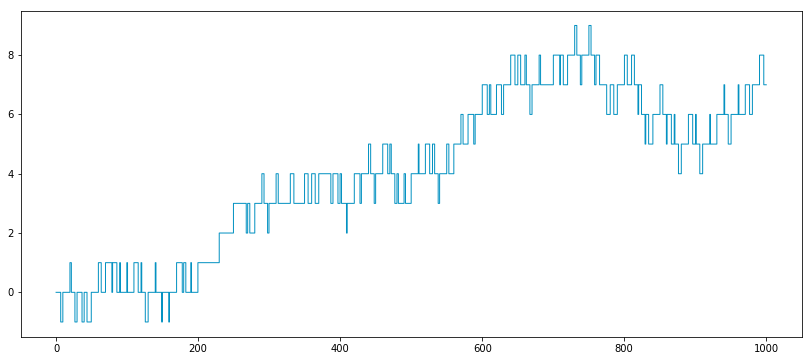

Average wait time: 10.75268817204301 minutes. 
Number of customer served: 93
Total profit: $1832


In [13]:
P_adjusted, T_adjusted, U_adjusted, C_adjusted, Q_adjusted = menu_simulation_adjusted(df, N, 10, 2, seed)

plt.figure(figsize=(14, 6))
plt.step(t, np.array(P_adjusted), where='mid', lw=1, color='#0492c2')

plt.figure(figsize=(14, 6))
plt.step(t, Q_adjusted, where='mid', lw=1, color='#0492c2')
plt.show()    


print("Average wait time: {} minutes. \nNumber of customer served: {}".format(N/len(list(set(T_adjusted))),  len(list(set(T_adjusted)))))
print("Total profit: ${}".format(P_adjusted[-1]))

### Static Plot: Profit per time unit comparison


Add more description here...

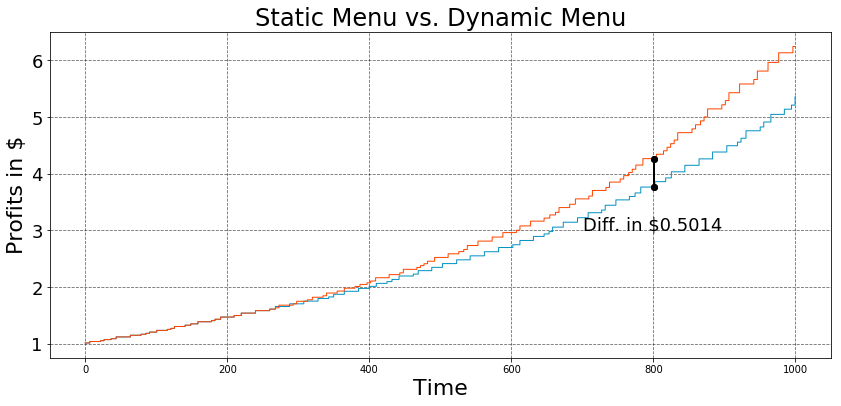

In [21]:
W = np.exp(np.array(P)/N)  # take log scale of profits for better display of the differences
min_W = np.min(W)  # min of W
X = np.exp(np.array(P_adjusted)/N)
max_X = np.max(X)
#X = drifted_brownian_motion(mu, sigma, N, T, seed)  # dynamic version
#max_X = np.max(X)  # max of X


# plot the two Time Series of profits per unit time

# formatting options
plt.figure(figsize=(14, 6))
plt.title('Static Menu vs. Dynamic Menu', fontsize=24)
plt.xlabel('Time', fontsize=22)
plt.ylabel('Profits in $', fontsize=22)
#plt.xticks(np.linspace(0, N, 2*T + 1), fontsize=18)
plt.yticks(fontsize=18)

plt.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
plt.step(t, W, where='mid', lw=1, color='#0492c2')  # Time Series with static menu
plt.step(t, X, where='mid', lw=1, color='#ff4500')  # Time Series with dynamic menu
plt.plot([t[800], t[800]], [W[800], X[800]], 'ko-', lw=2)  # vertical black line
plt.plot([t[800], t[800]], [W[800], X[800]], 'ko-', lw=2)  # vertical black line

plt.text(t[800]-100, (W[800] + X[800])/2-1, 'Diff. in ${:.4f}'.format(X[800]-W[800]), fontsize=18)  # the text next to the line
plt.show()


### Animation Plot: Profit per time unit comparison

Can insert GIF here if Animation takes too long to generate

Add more description here...

MovieWriter imagemagick unavailable.


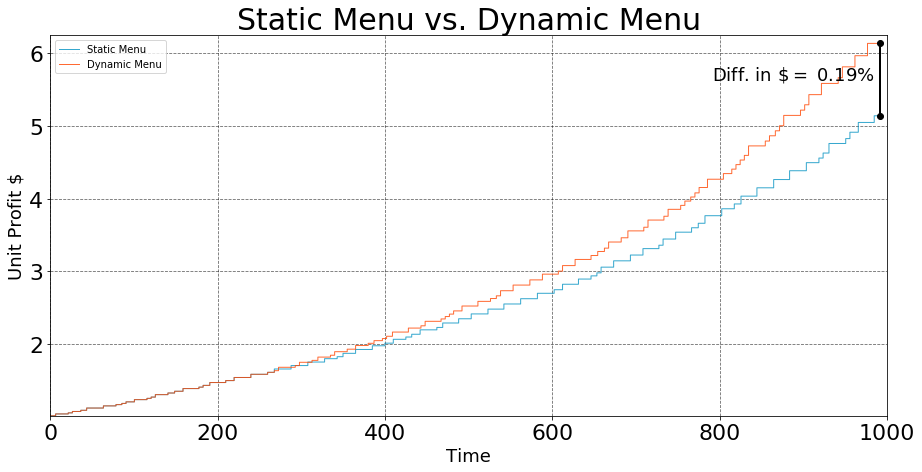

In [23]:
plt.rcParams["animation.html"] = "jshtml"

fig = plt.figure(figsize=(15, 7))  # instantiate a figure
ax = plt.axes(xlim=(0, N), ylim=(min_W, max_X))  # create an axes object

line_w, = ax.step([], [], where='mid', lw=1, color='#0492c2', alpha=0.8, label='Static Menu')  # line for W
line_x, = ax.step([], [], where='mid', lw=1, color='#ff4500', alpha=0.8, label='Dynamic Menu')  # line for X
diff_line, = ax.plot([], [], 'ko-', lw=2)  # line for the difference
text = ax.text(0, 0, '', fontsize=18)

# formatting options
ax.set_title('Static Menu vs. Dynamic Menu', fontsize=30)
#ax.set_xticks(np.linspace(0, T, 2*T + 1))
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Unit Profit $', fontsize=18)
ax.tick_params(labelsize=22)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.6)
ax.legend(loc=2)

# animation options
frames = 100
factor = N // frames
text_offset = -200

def animate(i):
    upper_bound = (i)*factor  # up to what index to take the values
    t_i = t[:upper_bound]
    
    line_w.set_data(list(t_i), list(W[:upper_bound]))  # set data for the W line
    line_x.set_data(list(t_i), list(X[:upper_bound]))  # set data for the X line
    diff_line.set_data([t[upper_bound], t[upper_bound]], [W[upper_bound], X[upper_bound]])  # position of the black line
    text.set_position((t[upper_bound] + text_offset, (W[upper_bound] + X[upper_bound])/2))  # position of the text
    text.set_text('Diff. in $\$  = $ {:.4f}%'.format(np.abs(X[upper_bound] - W[upper_bound])/W[upper_bound]))  # diff. value in the text
    
    return line_w, line_x, diff_line, text,
    
# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
# save the animation as GIF file 
anim.save('menu_time_series_animation.gif',writer='imagemagick')

#import matplotlib
#matplotlib.rcParams['animation.embed_limit'] = 2**128

anim